In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from utils import decision_regions

np.set_printoptions(suppress=True)

# Mis-steps in machine learning

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://subsurfwiki.org/wiki/Rock_Property_Catalog

In [2]:
df = pd.read_csv("https://geocomp.s3.amazonaws.com/data/RPC_simple.csv")

df.head()

,Vp,Vs,rho,Lithology
0,3045.6,1595.7,2.109121,sandstone
1,3000.6,1517.1,2.090342,sandstone
2,3363.6,2041.5,2.131990,sandstone
3,3195.3,1606.2,2.184939,sandstone
4,4237.5,2448.6,2.472231,sandstone


In [6]:
X = df[['Vp', 'rho']].values
y = df.Lithology.values

In [13]:
df['rho_kgm3'] = df['rho']  # Convert units.

In [7]:
np.unique(y)

array(['sandstone', 'shale'], dtype=object)

In [8]:
X[:5]

array([[3045.6       ,    2.10912059],
       [3000.6       ,    2.09034201],
       [3363.6       ,    2.13198998],
       [3195.3       ,    2.18493923],
       [4237.5       ,    2.47223077]])

It's usually easier to look at a plot:

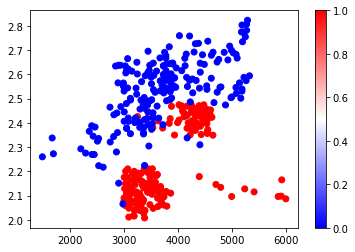

In [9]:
def is_sand(y):
    return y == 'sandstone'

plt.scatter(*X.T, c=is_sand(y), cmap='bwr')
plt.colorbar()

## A linear model: SVM

The **support vector machine** or SVM is a good model to start supervised classification with. It attempts to separate the classes with lines.

In [10]:
svc = SVC(kernel='linear')

svc.fit(X, y)

y_pred = svc.predict(X)

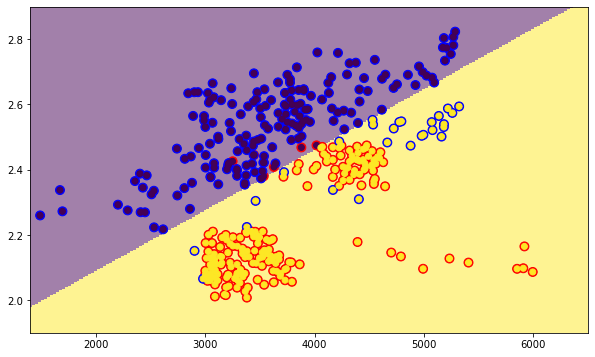

In [12]:
extent = [1400, 6500, 1.9, 2.9]
y_pred, y_all = decision_regions(svc, X, y, extent, step=(2, 0.005))

plt.figure(figsize=(10, 6))
plt.imshow(y_all <= 0.0, extent=extent, origin='lower', aspect='auto', alpha=0.5, interpolation='none')
plt.scatter(*X.T, c=is_sand(y), s=80, cmap='bwr')
plt.scatter(*X.T, c=is_sand(y_pred))
plt.show()

In [15]:
accuracy_score(y, y_pred)

0.92

<h2>❓ What do we think of this?</h2>
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

----

## Validation

### We only tested the model performance against the training data. Some things are hard to validate (e.g. not having much data, or unsupervised learning)... maybe we have to make up some rocks:

What could we do about it?

<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

Split off the first 300 rows:

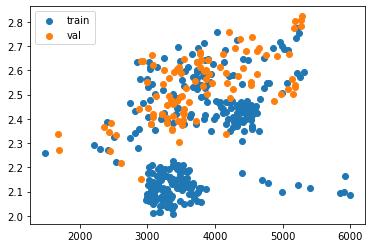

In [17]:
X_train, X_val = X[:300], X[300:]
y_train, y_val = y[:300], y[300:]

plt.scatter(*X_train.T, label='train')  # Blue points.
plt.scatter(*X_val.T, label='val')      # Orange points.
plt.legend()

<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

That's no good. The validation data (orange) does not contain any sandstone at all:

In [18]:
y_val == 'sandstone'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

So let's use a random split instead:

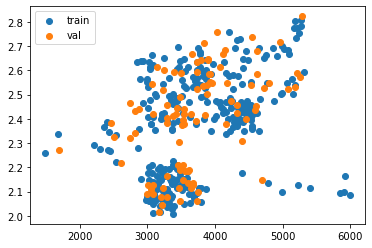

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=33, test_size=0.25)

plt.scatter(*X_train.T, label='train')
plt.scatter(*X_val.T, label='val')
plt.legend()

### ❓ Can you think of an occasion when a random split might not be okay?

<p>&nbsp;</p>

### ❓ Will the model be better or worse now?

<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

Because we're using less data to train, and because we're no longer checking the performance against data we trained on, the model gets a bit worse... but maybe we trust it more.

In [20]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.88


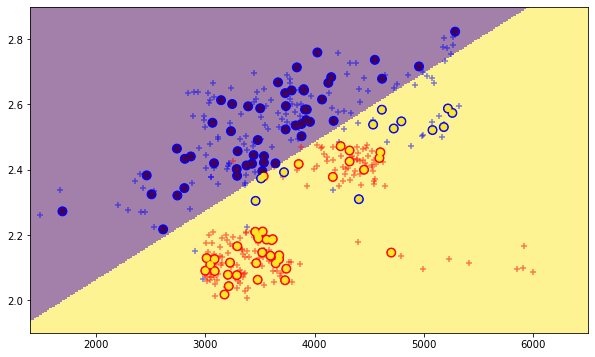

In [21]:
y_pred, y_all = decision_regions(svc, X_val, y_val, extent, step=(2, 0.005))

plt.figure(figsize=(10, 6))
plt.imshow(y_all <= 0.0, extent=extent, origin='lower', aspect='auto', alpha=0.5, interpolation='none')
plt.scatter(*X_train.T, c=is_sand(y_train), marker='+', cmap='bwr', alpha=0.50)
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))

---

## A more complex model

Notice that the model is linear (look carefully at the boundary).

### ❓ Will a non-linear model do better or worse?

<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

Let's try the default non-linear SVM, which uses a 'radial basis function' kernel.

In [22]:
svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.45


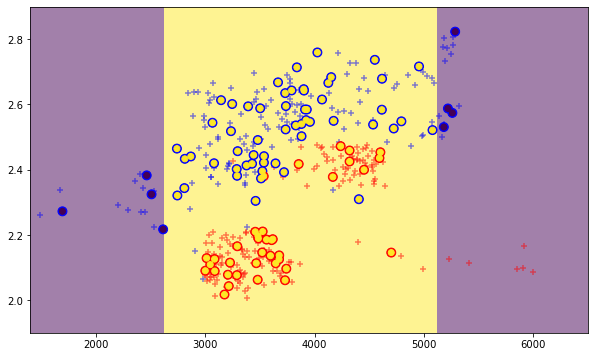

In [23]:
y_pred, y_all = decision_regions(svc, X_val, y_val, extent, step=(2, 0.005))

plt.figure(figsize=(10, 6))
plt.imshow(y_all <= 0.0, extent=extent, origin='lower', aspect='auto', alpha=0.5, interpolation='none')
plt.scatter(*X_train.T, c=is_sand(y_train), marker='+', cmap='bwr', alpha=0.50)
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))

### ❓ The model is terrible. Why?

<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

(1265.59752335, 6218.11440365, 1.9671286638887755, 2.8640572125634542)

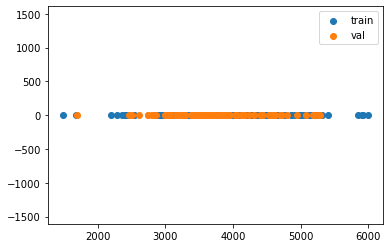

In [26]:
plt.scatter(*X_train.T, label='train')
plt.scatter(*X_val.T, label='val')
plt.legend()
plt.axis('equal')  # <-- So we can see the data space as sklearn 'sees' it.

---

## Standardization

We gave the model our raw data. We get away with it with the linear model, but any algorithms that depend on distance — either in the learning algorithm, or the cost function, or in regularization — would prefer to have standardized data. That way, they work in 'Z-score' space. (When you plot with `matplotlib` it's doing a min/max scaling on both axes so that the points look reasonable. It's a similar idea.)

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

(-3.3693360825748675,
 3.3263549699478703,
 -1.8857643299023503,
 2.335640232938942)

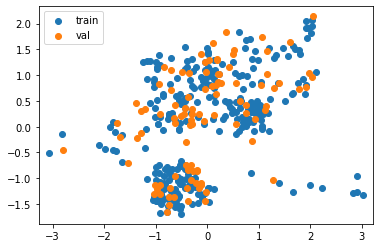

In [28]:
plt.scatter(*X_train.T, label='train')
plt.scatter(*X_val.T, label='val')
plt.legend()
plt.axis('equal')  # <-- So we can see the data space as sklearn 'sees' it.

The linear model should do about as well as before:

In [29]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.89


But the non-linear model will be much better:

In [30]:
svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.96


(-2.5, 2.5)

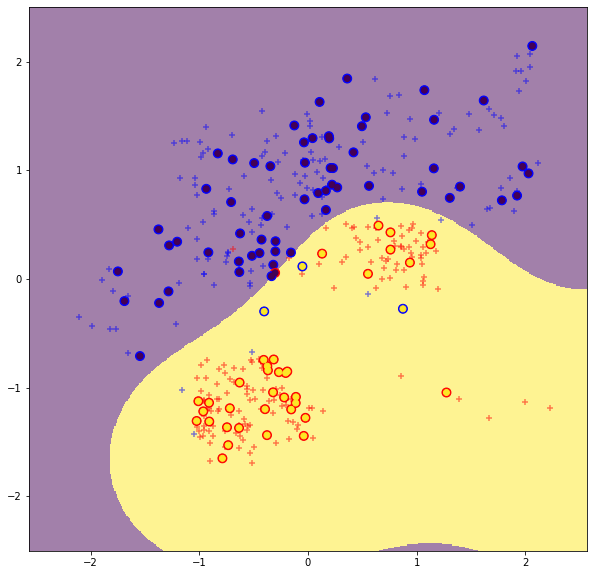

In [31]:
extent = [-3, 3, -3, 3]

y_pred, y_all = decision_regions(svc, X_val, y_val, extent, step=(0.01, 0.01))

plt.figure(figsize=(10, 10))
plt.imshow(y_all <= 0.0, extent=extent, origin='lower', aspect='auto', alpha=0.5, interpolation='none')
plt.scatter(*X_train.T, c=is_sand(y_train), marker='+', cmap='bwr', alpha=0.5)
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))
plt.axis('equal')
plt.xlim(-2.5, 2.5); plt.ylim(-2.5, 2.5)

Notice at the bottom that the model is still not suitable for extrapolation.

---

## Untuned model

We didn't try to adjust hyperparameters to get a better fit. Turns out, if you do this, the model does better with a different value for `C`:

In [ ]:
svc = SVC(C=100)

In [ ]:
svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

print(accuracy_score(y_val, y_pred))

plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))

In [ ]:
y_pred, y_all = decision_regions(svc, X_val, y_val, extent, step=0.02)
    
plt.figure(figsize=(10, 10))
plt.imshow(y_all <= 0.0, extent=extent, origin='lower', aspect='auto', alpha=0.5, interpolation='none')
plt.scatter(*X_train.T, c=is_sand(y_train), marker='+', cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))
plt.axis('equal')
plt.xlim(-2.5, 2.5); plt.ylim(-2.5, 2.5)
plt.show()

Now we have to make a decision about what we think is more reasonable.

After that, there are plenty more gotchas:

- We have assumed that the labels are correct and the data is accurate.
- A few hundred records is not much data; we should be careful about where we apply this model.
- We have only tried one model type, and have not tuned all of its hyperparameters.
- As we add more features, we have to remember the curse of dimensionality.
- As we try more things, we need to start using a `test` dataset.

---
&copy; 2021 Agile Scientific CC-BY